You can find the data here https://www.kaggle.com/competitions/111-1-ntut-ee-ai-hw2

# <a style =background:yellow;color:black > STEPS </a>

The steps that will be done in this notebook are the following:

1. Perform some EDA and check if the classes are balanced.
2. Remove some pictures from the classes that are not balanced.
3. Check the size of the pictures and remove the pictures that are smaller than (256,256,3).
4. For the remaining images, take a crop (256,256,3) sized.
5. Split the data in training, validation and testing set (notice that even if you have the test folder, you cannot use it as testing set, because it doesn't have the target variable; therefore, you can use the test folder just to do inference eventually).

## <a style=background:yellow;color:black> EDA </a>

In [ ]:
from keras.utils import load_img 
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
import shutil
import pandas as pd

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/tw_food_101.zip

In [ ]:
imgs_path = '/content/tw_food_101/train/'

x_pixels = []
y_pixels = []

for class_ in os.listdir(imgs_path):
  for img in os.listdir(imgs_path+class_):
      if img != '.DS_Store':
          my_img = np.array(load_img(imgs_path+class_+'/'+img))
          y_pixels.append(my_img.shape[0]) # remember that shape[0] represents the y pixels
          x_pixels.append(my_img.shape[1])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 256 bytes but only got 230. Skipping tag 50341
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3004 bytes but only got 0. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


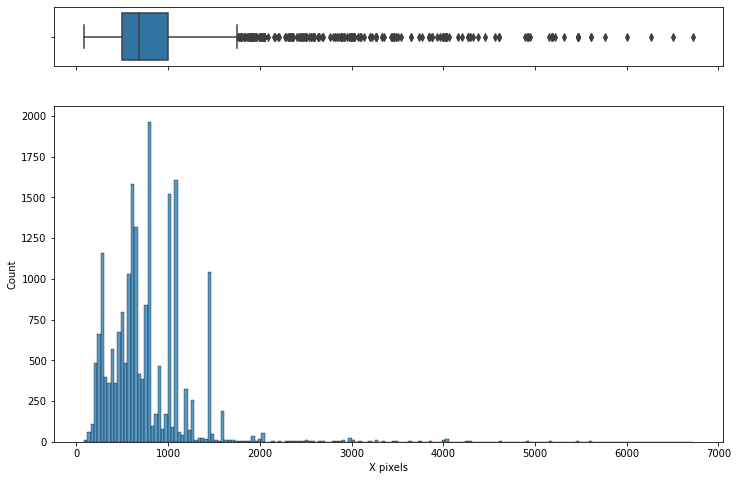

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(12,8)) #15% height of the picture for the boxplot and 85% for the hist
 
# assigning a graph to each ax
sns.boxplot(x_pixels, ax=ax_box)
sns.histplot(data=x_pixels, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_hist.set(xlabel='X pixels')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


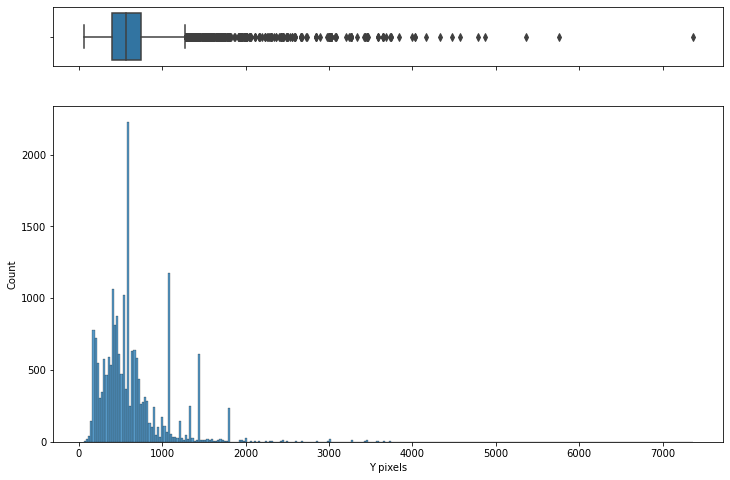

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(12,8)) #15% height of the picture for the boxplot and 85% for the hist
 
# assigning a graph to each ax
sns.boxplot(y_pixels, ax=ax_box)
sns.histplot(data=y_pixels, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_hist.set(xlabel='Y pixels')
plt.show()

Let's remove all the pictures with a shape bigger than (1150,1150,3). We can do that because the majority of pictures is in the range 0-1150 both for x pixels that for y pixels. Moreover, since we will remove other images in order to balance the classes, I double-checked that the removed pictures are not all in the lower frequency classes (if the pictures with size greater than (1150,1150,3) were all in the lowest frequency classes, we couldn't remove them even if they were the minority because we need to have a sufficient number of pictures for each class).

In [ ]:
os.makedirs('tw_food_101_less_imgs_2/train')

In [ ]:
imgs_path = '/content/tw_food_101/train/'

for class_ in os.listdir(imgs_path):
  os.makedirs('/content/tw_food_101_less_imgs_2/train/'+class_)
  for img in os.listdir(imgs_path+class_):
      if img != '.DS_Store':
          my_img = np.array(load_img(imgs_path+class_+'/'+img))
          if my_img.shape[0] <= 1150 and my_img.shape[1] <= 1150:
            PIL_img = Image.fromarray(my_img)
            PIL_img.save('/content/tw_food_101_less_imgs_2/train/'+class_+'/'+img)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 256 bytes but only got 230. Skipping tag 50341
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3004 bytes but only got 0. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to

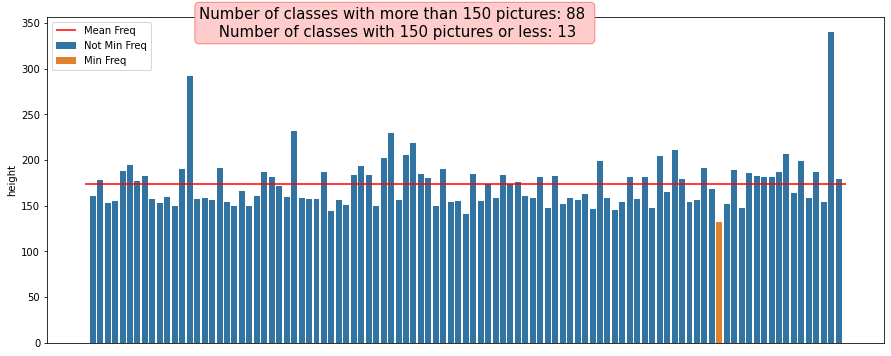

In [ ]:
new_img_path = '/content/tw_food_101_less_imgs_2/train'
#new_img_path = '/content/gdrive/MyDrive/tw_food_101_less_imgs_2/train'

classname_numpictures = {}
for class_name in os.listdir(new_img_path):
    if class_name!='.DS_Store':
        classname_numpictures[class_name]=len(os.listdir(new_img_path+'/'+class_name))

mean_freq = np.mean(list(classname_numpictures.values()))

f, axs = plt.subplots(1,figsize=(15,6))

height = np.array(list(classname_numpictures.values()))
bars = classname_numpictures.keys()
x_pos = np.arange(len(bars))
min_height_t_f = np.where(height==np.min(height),1,0) # to color the bars

df = pd.DataFrame({'x_pos':x_pos, 'height':height,
                   'min_height_t_f':min_height_t_f})

labels=['Not Min Freq', 'Min Freq']

df['min_height_t_f_label']=df['min_height_t_f'].map(dict(zip([0,1], labels))) # to color the bars

sns.barplot(data=df, x='x_pos', y='height', hue='min_height_t_f_label', hue_order = labels, ax=axs, dodge=False)
# dodge = False otherwise the bars look too tiny

plt.xticks([])
plt.xlabel('')
axs.hlines(y=mean_freq, colors='red', xmin=-1, xmax=101, label='Mean Freq')
axs.legend()

# For the text box
counter_greater_150 = 0
counter_smaller_or_eq_150 = 0
for class_ in os.listdir(new_img_path+'/'):
  if len(os.listdir(new_img_path+'/'+class_)) > 150:
    counter_greater_150+=1
  else:
    counter_smaller_or_eq_150+=1

my_text = 'Number of classes with more than 150 pictures: {} \n Number of classes with 150 pictures or less: {}'.format(counter_greater_150, counter_smaller_or_eq_150)
plt.text(len(bars)/2 -10, np.max(height)+10,my_text, size=15, rotation=0,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5), # edge of the box
                   fc=(1., 0.8, 0.8), # inner color of the box
                   )
         )
plt.show()

In [ ]:
lala_path = '/content/tw_food_101_less_imgs_2/train/'



print(counter_greater_150)
print(counter_smaller_or_eq_150)


88
13


In [ ]:
counter_original = 0
counter_filtered = 0

for class_ in os.listdir('/content/tw_food_101/train'):
  for img_ in os.listdir('/content/tw_food_101/train/'+class_):
    counter_original+=1
  for img_2 in os.listdir('/content/tw_food_101_less_imgs_2/train/'+class_):
    counter_filtered+=1

print("\t Original number of pictures: {} \n \t New number of pictures: {} \n \t Difference: {} ".format(counter_original, counter_filtered, counter_original-counter_filtered))

	 Original number of pictures: 20372 
 	 New number of pictures: 17552 
 	 Difference: 2820 


## <a style=background:yellow;color:black> Balance the classes, split the data in training,validation and testing set </a>

Let's keep maximum 150 pictures from each class (the class with the least number of pictures has 132 pictures). All the removed pictures will go in the actual test set. For the classes with less than 150 pictures take just 10 pictures and move them into the test set. At the end the maximum disparity will be 28 (150-(132-10)) which is the 21.2% of pictures of the class with 132 pictures. The reason why I think there will be a good balance is that the highest frequency class of the MNIST dataset (1 class) has a disparity of 23.8% with the lowest frequency class (5 class) (percentage calculated on the base of the lowest frequency class).

In [ ]:
classes = pd.read_csv('/content/tw_food_101/tw_food_101_classes.csv', header=None,
                     names=['class index', 'food name'])

In [ ]:
for i in ['train', 'valid', 'test']:
  os.makedirs('tw_food_101_final/'+i)

In [ ]:
path_from = '/content/tw_food_101_less_imgs_2/train/'
train_path_to = '/content/tw_food_101_final/train/'
valid_path_to = '/content/tw_food_101_final/valid/'
test_path_to = '/content/tw_food_101_final/test/'

for class_ in os.listdir(path_from):
  os.makedirs(train_path_to+class_)
  os.makedirs(valid_path_to+class_)
  os.makedirs(test_path_to+class_)
  if len(os.listdir(path_from+class_)) > 150:
    for img_path in os.listdir(path_from+class_)[:150]:
      shutil.move(path_from+class_+'/'+img_path, train_path_to+class_+'/'+img_path)
    for img_path_2 in os.listdir(path_from+class_): # You don't have to write [150:] here, because 
    # you've moved the first 150 images from the path_from to train_path_to and so
    # the images that were in path_from are not there anymore. So, you just have to put in
    # the test_path_to the remamining images there are in path_from
      shutil.move(path_from+class_+'/'+img_path_2, test_path_to+class_+'/'+img_path_2)
  else:
    for img_path_3 in os.listdir(path_from+class_)[:-10]:
      shutil.move(path_from+class_+'/'+img_path_3, train_path_to+class_+'/'+img_path_3)
    for img_path_4 in os.listdir(path_from+class_):
      shutil.move(path_from+class_+'/'+img_path_4, test_path_to+class_+'/'+img_path_4)

Finally, let's move 10% of the images of each class in the validation set. 


In [ ]:
for class_ in os.listdir(train_path_to):
  num_pictures_to_move_in_val = int(len(os.listdir(train_path_to+class_))*0.1)
  for img_path in os.listdir(train_path_to+class_)[-num_pictures_to_move_in_val:]:
    shutil.move(train_path_to+class_+'/'+img_path, valid_path_to+class_+'/'+img_path)

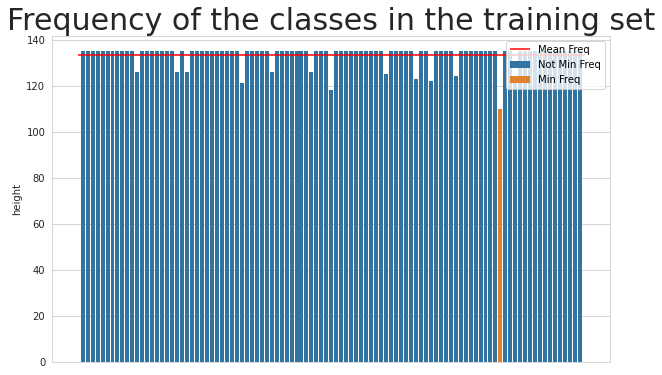

In [ ]:
new_img_path = '/content/tw_food_101_final/train'

classname_numpictures = {}
for class_name in os.listdir(new_img_path):
    if class_name!='.DS_Store':
        classname_numpictures[class_name]=len(os.listdir(new_img_path+'/'+class_name))

mean_freq = np.mean(list(classname_numpictures.values()))

title='Frequency of the classes in the training set'

with sns.axes_style("whitegrid"):
  f, axs = plt.subplots(1,figsize=(10,6))
  plt.title(title, fontsize=30)

height = np.array(list(classname_numpictures.values()))
bars = classname_numpictures.keys()
x_pos = np.arange(len(bars))
min_height_t_f = np.where(height==np.min(height),1,0) # to color the bars

df = pd.DataFrame({'x_pos':x_pos, 'height':height,
                   'min_height_t_f':min_height_t_f})

labels=['Not Min Freq', 'Min Freq']

df['min_height_t_f_label']=df['min_height_t_f'].map(dict(zip([0,1], labels))) # to color the bars

sns.barplot(data=df, x='x_pos', y='height', hue='min_height_t_f_label', hue_order = labels, ax=axs, dodge=False)

plt.xticks([])
plt.xlabel('')
axs.hlines(y=mean_freq, colors='red', xmin=-1, xmax=101, label='Mean Freq')
axs.legend()
plt.show()

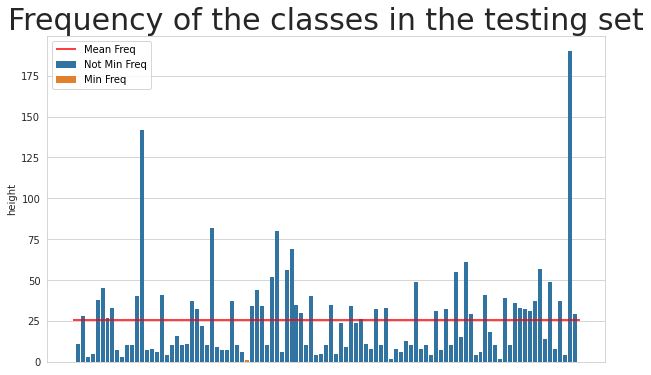

In [ ]:
new_img_path = '/content/tw_food_101_final/test'

classname_numpictures = {}
for class_name in os.listdir(new_img_path):
    if class_name!='.DS_Store':
        classname_numpictures[class_name]=len(os.listdir(new_img_path+'/'+class_name))

mean_freq = np.mean(list(classname_numpictures.values()))

title='Frequency of the classes in the testing set'

with sns.axes_style("whitegrid"):
  f, axs = plt.subplots(1,figsize=(10,6))
  plt.title(title, fontsize=30)

height = np.array(list(classname_numpictures.values()))
bars = classname_numpictures.keys()
x_pos = np.arange(len(bars))
min_height_t_f = np.where(height==np.min(height),1,0) # to color the bars

df = pd.DataFrame({'x_pos':x_pos, 'height':height,
                   'min_height_t_f':min_height_t_f})

labels=['Not Min Freq', 'Min Freq']

df['min_height_t_f_label']=df['min_height_t_f'].map(dict(zip([0,1], labels))) # to color the bars

sns.barplot(data=df, x='x_pos', y='height', hue='min_height_t_f_label', hue_order = labels, ax=axs, dodge=False)

plt.xticks([])
plt.xlabel('')
axs.hlines(y=mean_freq, colors='red', xmin=-1, xmax=101, label='Mean Freq')
axs.legend()
plt.show()

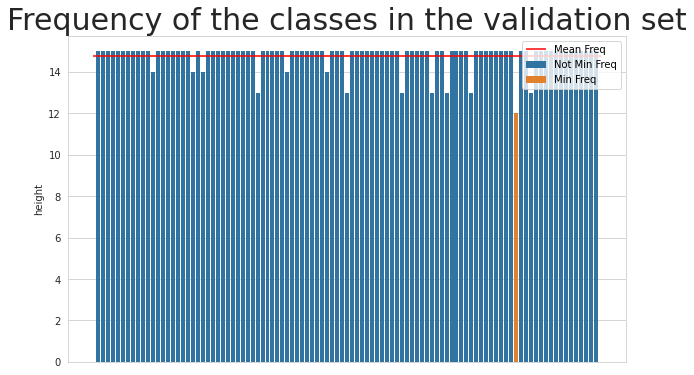

In [ ]:
new_img_path = '/content/tw_food_101_final/valid'

classname_numpictures = {}
for class_name in os.listdir(new_img_path):
    if class_name!='.DS_Store':
        classname_numpictures[class_name]=len(os.listdir(new_img_path+'/'+class_name))

mean_freq = np.mean(list(classname_numpictures.values()))

title='Frequency of the classes in the validation set'

with sns.axes_style("whitegrid"):
  f, axs = plt.subplots(1,figsize=(10,6))
  plt.title(title, fontsize=30)

height = np.array(list(classname_numpictures.values()))
bars = classname_numpictures.keys()
x_pos = np.arange(len(bars))
min_height_t_f = np.where(height==np.min(height),1,0) # to color the bars

df = pd.DataFrame({'x_pos':x_pos, 'height':height,
                   'min_height_t_f':min_height_t_f})

labels=['Not Min Freq', 'Min Freq']

df['min_height_t_f_label']=df['min_height_t_f'].map(dict(zip([0,1], labels))) # to color the bars

sns.barplot(data=df, x='x_pos', y='height', hue='min_height_t_f_label', hue_order = labels, ax=axs, dodge=False)

plt.xticks([])
plt.xlabel('')
axs.hlines(y=mean_freq, colors='red', xmin=-1, xmax=101, label='Mean Freq')
axs.legend()
plt.show()

In [ ]:
shutil.make_archive('/content/tw_food_101_final_zipped', 'zip', '/content/tw_food_101_final')

'/content/tw_food_101_final_zipped.zip'

In [ ]:
os.rename('/content/tw_food_101_final_zipped.zip', '/content/tw_food_101_final.zip')

In [ ]:
shutil.move('/content/tw_food_101_final.zip',  '/content/gdrive/MyDrive/tw_food_101_final.zip')

'/content/gdrive/MyDrive/tw_food_101_final.zip'

# <a style=background:yellow;color:black> ASIDE </a>
### <a style=color:black;background:yellow> What does resize an image means?</a>

* What happens when we resize  a (1000,1150,3) image to (512,512,3) ?

* How is it possible that a (150,200,3) image could be resized to (512,512,3)?
Basically there are three different techniques (with nearest neightbours, with Bilinear and with Bicubic).

In [ ]:
# TO UNDERSTAND HOW BILINEAR WORKS (BUT ACTUALLY IT IS NOT AS EXPECTED)
to_rescale = np.array([1,5,100,0,0,1,15,25,50],np.int8).reshape(3,3)

img = Image.fromarray(to_rescale)
rescaled = img.resize((9,9), Image.BILINEAR)

print(to_rescale)
print()
print(np.array(rescaled))

[[  1   5 100]
 [  0   0   1]
 [ 15  25  50]]

[[  1   1   2   4   5  37  68 100 100]
 [  1   1   2   4   5  37  68 100 100]
 [  1   1   1   3   3  25  46  67  67]
 [  0   0   1   1   2  12  23  34  34]
 [  0   0   0   0   0   0   1   1   1]
 [  5   5   6   7   8  11  15  17  17]
 [ 10  10  12  15  17  22  28  34  34]
 [ 15  15  18  22  25  33  42  50  50]
 [ 15  15  18  22  25  33  42  50  50]]


In [ ]:
imgs_paths_greater_than_1000 = []
imgs_paths_smaller_than_512 = []

train_path = '/content/gdrive/MyDrive/tw_food_101_final_data/train/'
for class_ in os.listdir(train_path):
  for img in os.listdir(train_path+class_):
    if len(imgs_paths_greater_than_1000)==3 and len(imgs_paths_smaller_than_512)==3:
      break
    else:
      if len(imgs_paths_greater_than_1000)!=3 and np.array(load_img(train_path+class_+'/'+img)).shape > (1000,1000,3): # You have to add the condition also here because 
      # the condition above is True just when both the lists are long 3, but if one list increases faster than the other (e.g. one is long 0 and the other 
      # is long 5), then the condition'll never happen.
        imgs_paths_greater_than_1000.append(train_path+class_+'/'+img)
      elif len(imgs_paths_smaller_than_512)!=3 and np.array(load_img(train_path+class_+'/'+img)).shape < (512,512,3):
        imgs_paths_smaller_than_512.append(train_path+class_+'/'+img)

imgs_paths = imgs_paths_greater_than_1000 + imgs_paths_smaller_than_512

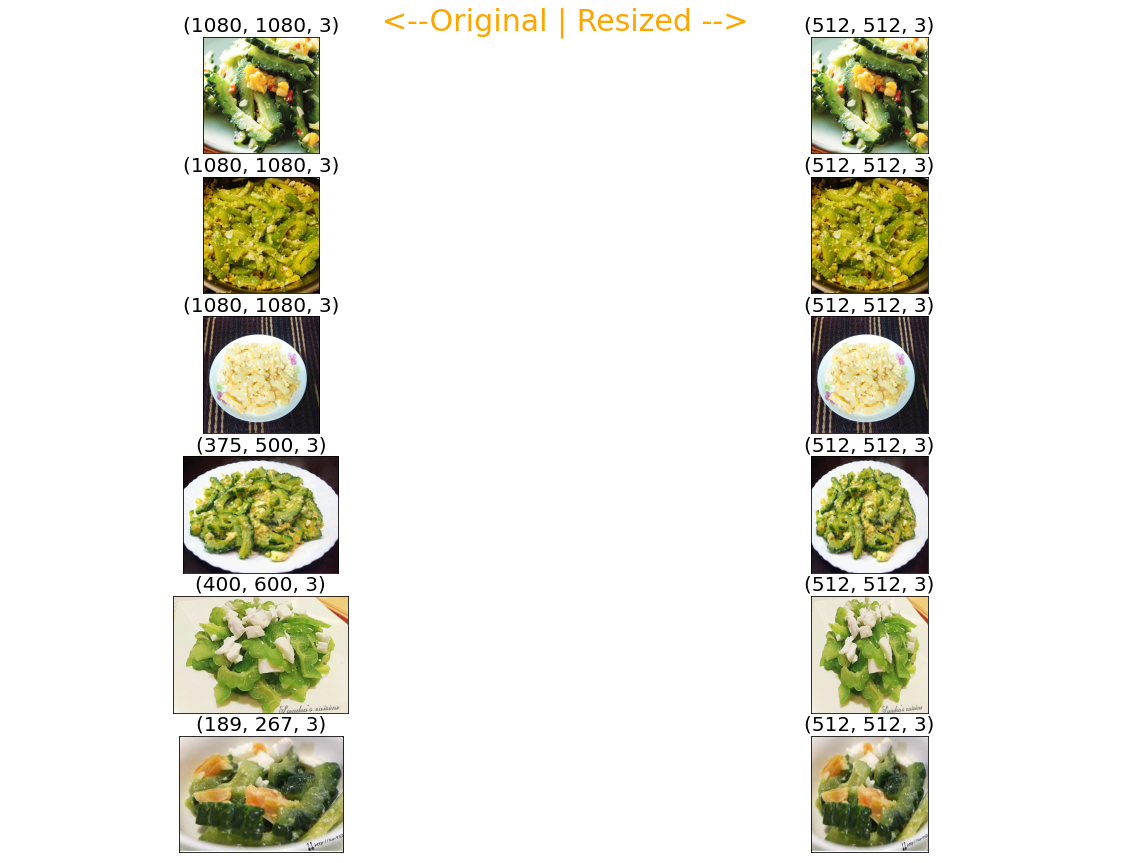

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.title('<--Original | Resized -->', fontsize=30, color='orange')
plt.box()
plt.xticks([])
plt.yticks([])
# ORIGINAL
for i,j in enumerate(np.arange(1,12,2)):
    img_original = np.array(load_img(imgs_paths[i]))
    fig.add_subplot(6,2,j)
    plt.title(str(img_original.shape), fontsize=20)
    plt.imshow(img_original)
    plt.xticks([])
    plt.yticks([])

# RESIZED 
for i,j in enumerate(np.arange(2,13,2)):
    img= Image.open(imgs_paths[i])
    img_resized = np.array(img.resize((512,512), Image.BICUBIC))
    fig.add_subplot(6,2,j)
    plt.title(str(img_resized.shape), fontsize=20)
    plt.imshow(img_resized)
    plt.xticks([])
    plt.yticks([])

I cannot take a crop of the images because even if some of them are bigger the plate with the food always occupies almost the entire picture. I'll resize the images during the training in (512,512,3) because the ones that look stretched are just the smaller ones and since we the majority of our images are bigger, we should not have problems.